In [69]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
rc('animation', html='jshtml')

from IPython.display import set_matplotlib_formats

#set_matplotlib_formats("png")
plt.rc("xtick", labelsize=16, top=True,direction="in") #Fontstørrelse på akser, ticks indad
plt.rc("ytick", labelsize=16, right=True, direction="in") #Samme som ovenstående men for y
plt.rc("axes",grid=True,linewidth=1.3) #Slår grid til, og sætter tykkelsen af plot-spine
plt.rc("grid",ls=":",lw=1) #Sætter gridstyle som ":"
plt.rc('font', size=16) #Font og fontstørrelse
plt.rc("figure",figsize=(5,3),dpi=250) #Figurstørrelse og opløsningen på graferne
plt.rc("ytick.major",width=1.3) #Sætter tykkelsen på yticks
plt.rc("xtick.major",width=1.3) #Sætter tykkelsen på xticks

In [70]:
data_z = [  # m
    0.070, 0.570 ,1.060
]

# Ploariseer filter is on

# Wavelenghts are for MID-IR and in 1/cm
energy_of_beam_lambda_3355_1_cm = [  # mW
    [
        33, 34, 34, 30, 30, 30, 32, 30, 29, 24, 20, 18, 17, 14, 10, 7, 5, 4, 1, 0, 0, 0, 0, 0
    ],
    [
        28, 28, 30, 28, 25, 26, 22, 20, 17, 14, 12, 12, 12, 10, 9, 7, 6, 5, 4, 2, 1, 0, 0, 0
    ],
    [
        23, 19, 18, 14, 16, 14, 11, 11, 12, 11, 13, 12, 10, 10, 7, 7, 7, 6, 4, 4, 3, 1, 0, 0 
    ]
]

energy_of_beam_lambda_3864_1_cm = [  # mW
    [
        20, 20, 19, 21, 21, 19, 15, 15, 19, 17, 13, 12, 13, 12, 8, 8, 5, 3, 1, 0, 0, 0 
    ],
    [
        20, 17, 14, 15, 16, 15, 14, 14, 14, 11, 10, 7, 7, 7, 5, 4, 3, 3, 2, 2, 1, 0, 0
    ],
    [
        10, 9, 9, 10, 7, 6, 5, 7, 4, 4, 6, 5, 5, 3, 4, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0
    ]
]

# one round from 0 to 0 is 0.5 mm we will do with this step size 
# Starting from 0 mm on the thorlabs thing
# m from the top of the laser beam
position_of_blade = np.arange(0, 10, 0.5)

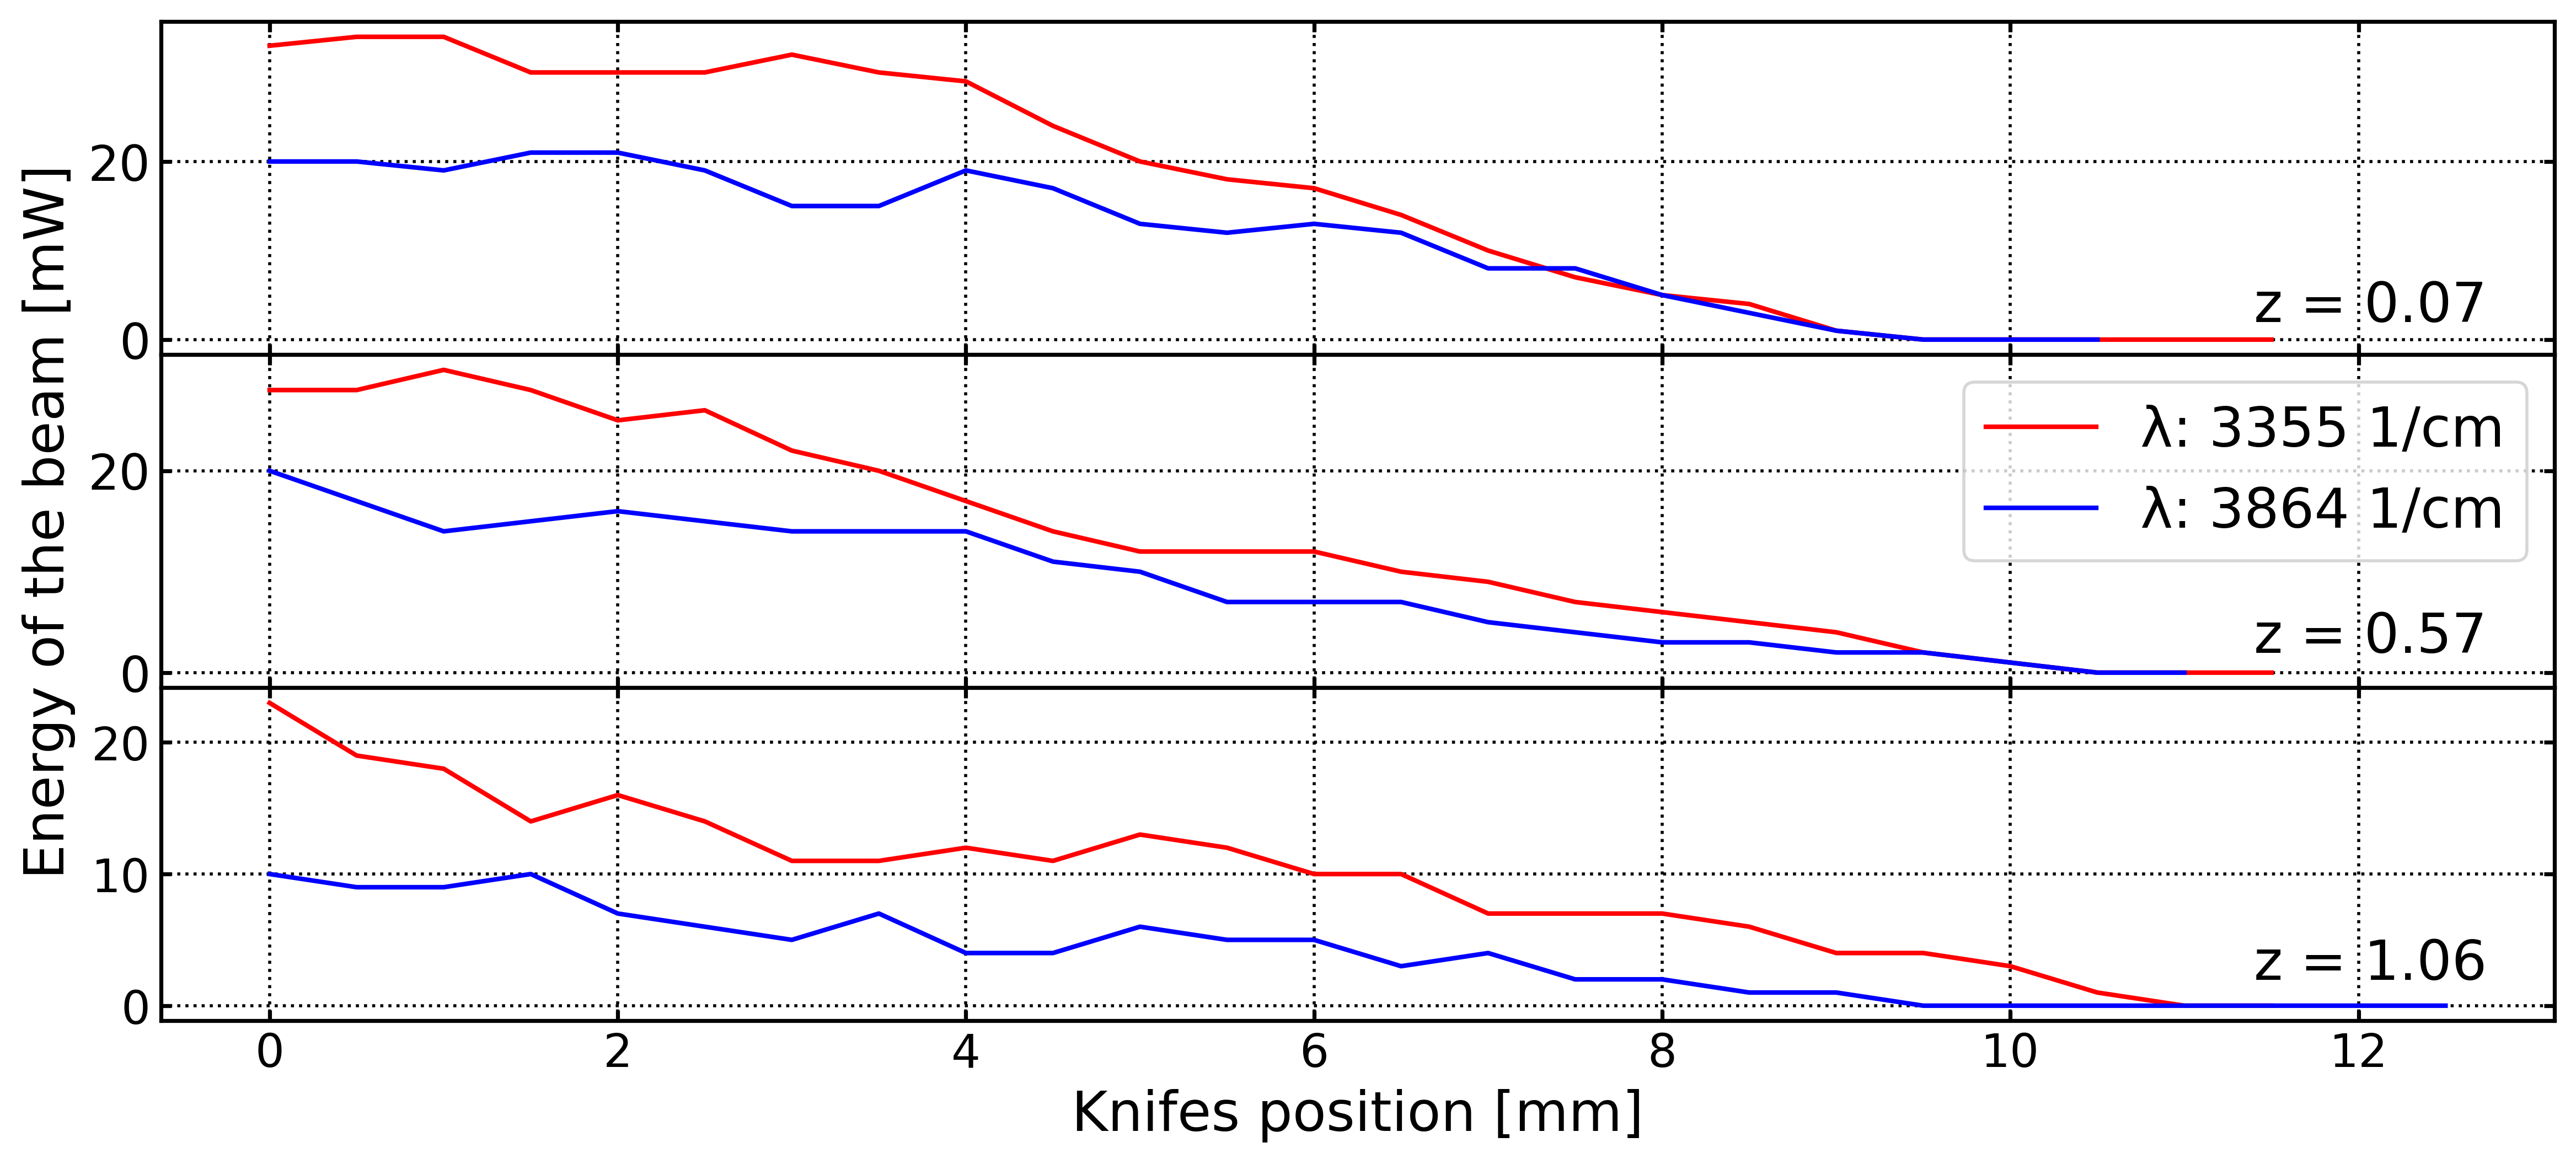

In [94]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(14, 6), dpi=400)

tick_options = ["-", "--", "-."]
i = 0
for z_0, e_3355, e_3864, lines, ax in zip(data_z, energy_of_beam_lambda_3355_1_cm, 
                               energy_of_beam_lambda_3864_1_cm,
                               tick_options, axs
                              ):
    
    e_3355_e = np.array(e_3355)
    energy_joule_3355 = e_3355_e
    position_of_blade3355 = np.arange(0, len(energy_joule_3355) / 2, 0.5)
    ax.plot(position_of_blade3355, energy_joule_3355, label=f"λ: 3355 1/cm",
            color="red", # linestyle=lines
            )
    
    e_3864_e = np.array(e_3864)                           
    energy_joule_3864 = e_3864_e
    position_of_blade3864 = np.arange(0, len(energy_joule_3864) / 2, 0.5)
    ax.plot(position_of_blade3864, energy_joule_3864, 
             label=f"λ: 3864 1/cm",
             color="blue", # linestyle=lines
            )
    ax.grid(which="major",color="black",linewidth='1',linestyle=":")
    plt.tick_params(direction="in", top=True, right=True, labelsize=15)
    
    ax.text(11.4, 2, f"z = {z_0}")
    
    if i == 1:
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1)) 
    i += 1

#ax.grid(which="major",color="black",linewidth='1',linestyle=":")
#plt.tick_params(direction="in", top=True, right=True, labelsize=15) 
    plt.tick_params(direction="in", top=True, right=True, labelsize=15)

#plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))     
#plt.ylabel("Energy of the beam with offsets [mJ]")
#plt.xlabel("Position of the knife [mm]")
plt.subplots_adjust(hspace=0, wspace=0.1)
axs[2].set_xlabel("Knifes position [mm]")
axs[1].set_ylabel("Energy of the beam [mW]")
plt.show()            

In [101]:
# From reading the graph
beam_diameter_0_r =  9.5 - 3
beam_diameter_1_r = 10.5 - 2.5
beam_diameter_2_r = 11 - 2

# From reading the graph
beam_diameter_0_b = 9.5 - 4
beam_diameter_1_b = 10.5 - 4
beam_diameter_2_b = 9.5 - 2.5

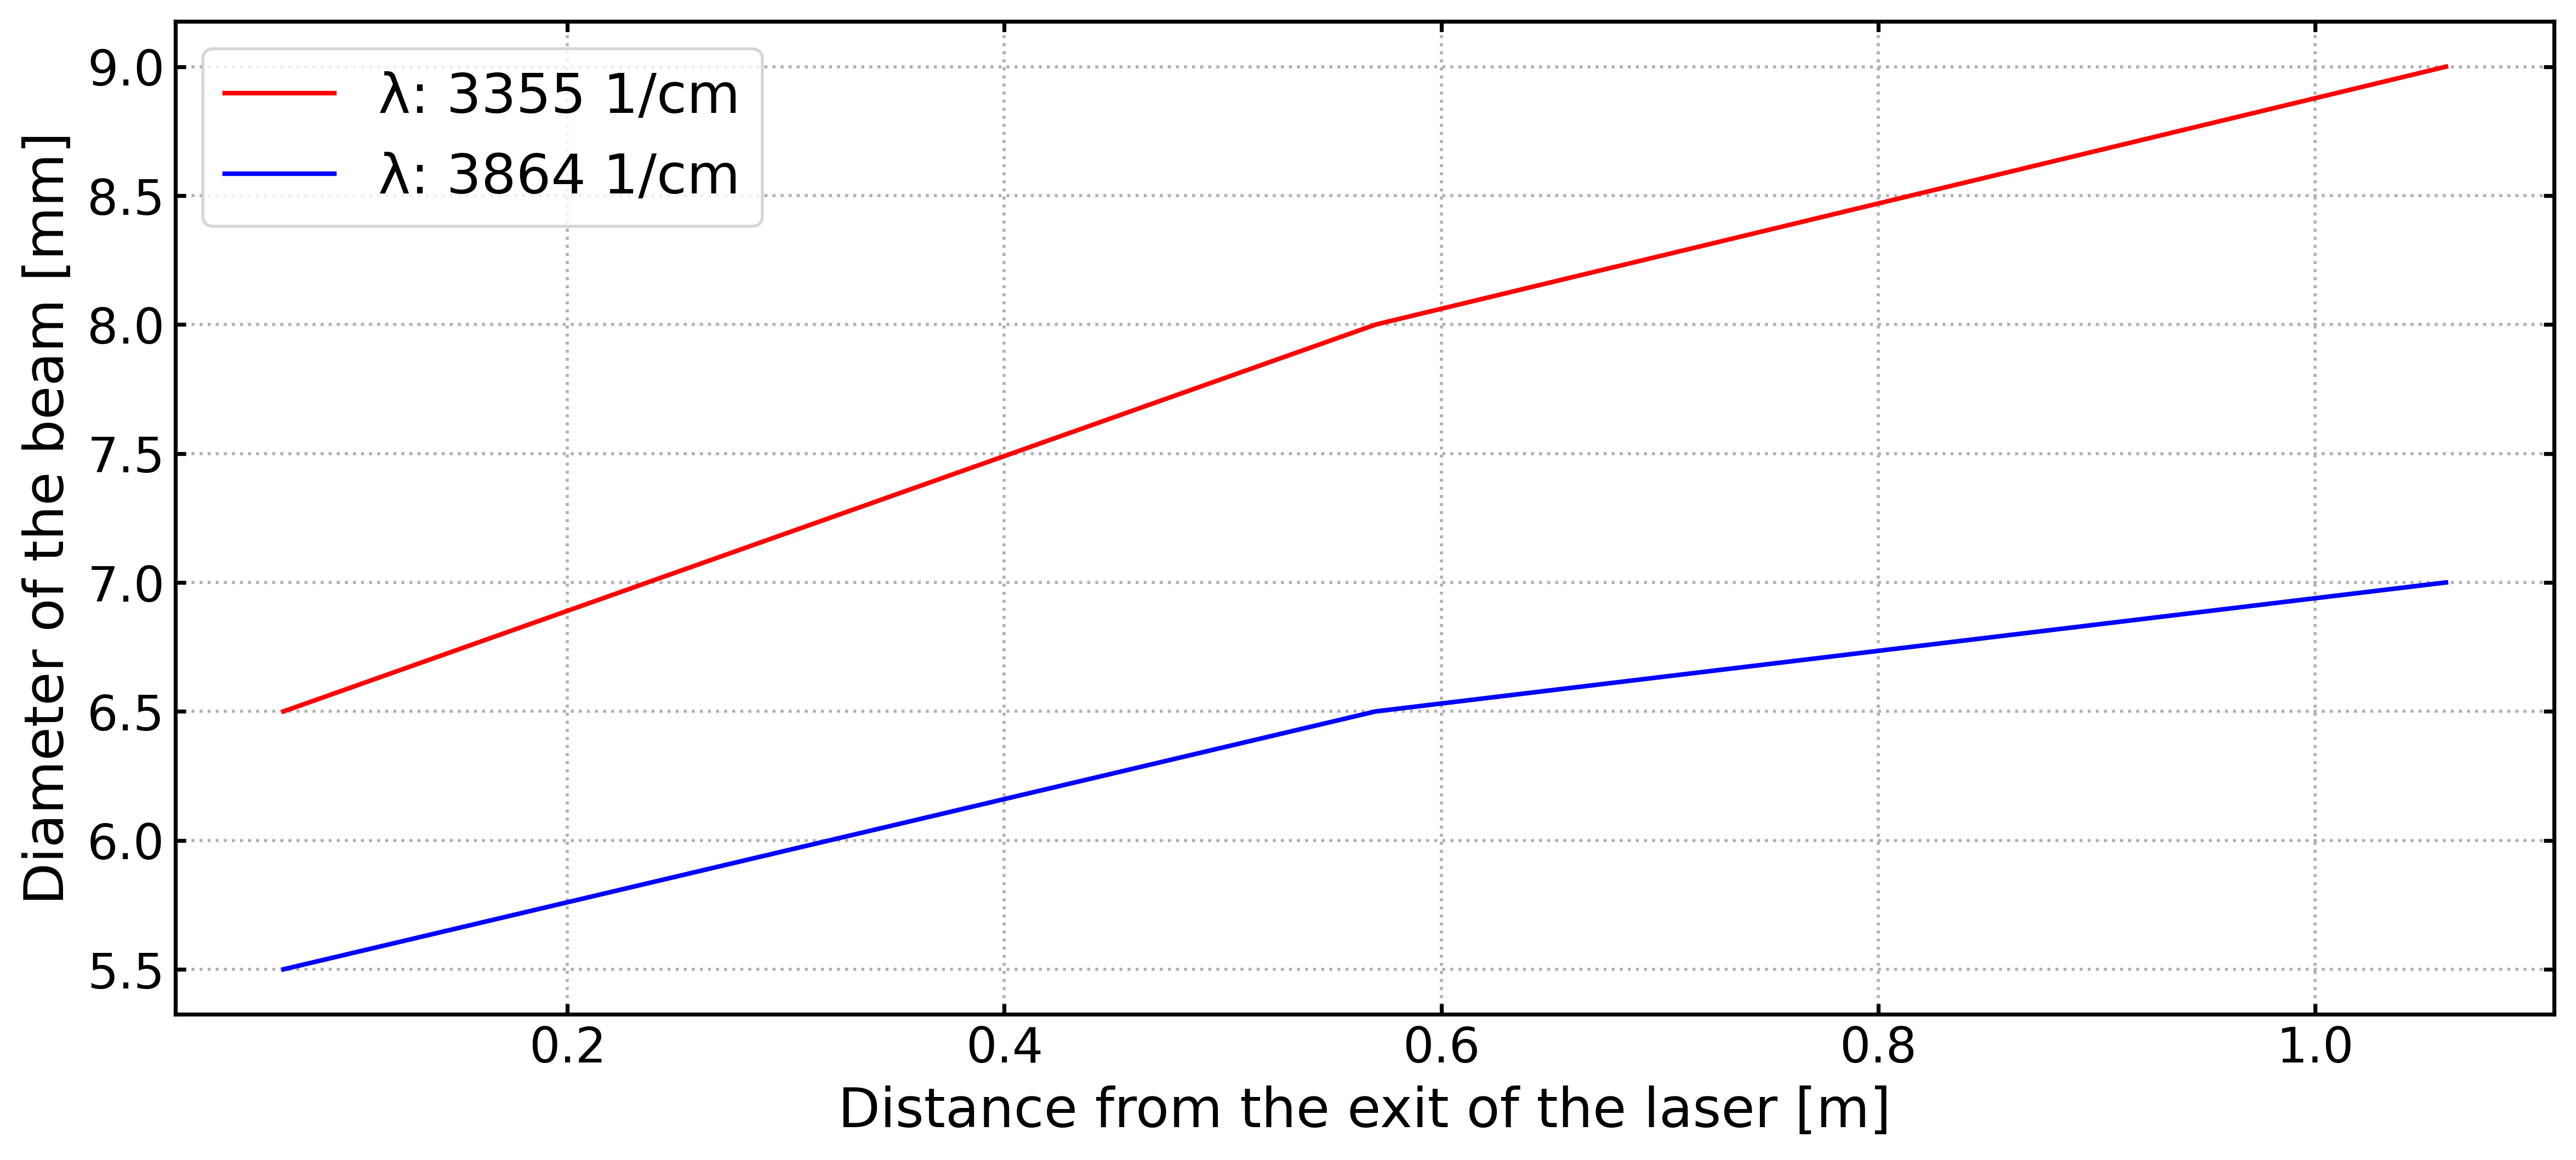

In [107]:
fig, axs = plt.subplots(figsize=(14, 6), dpi=400)

plt.plot(data_z, [beam_diameter_0_r, beam_diameter_1_r, beam_diameter_2_r], 
         color='red', label=f"λ: 3355 1/cm")
plt.plot(data_z, [beam_diameter_0_b, beam_diameter_1_b, beam_diameter_2_b], 
         color='blue', label=f"λ: 3864 1/cm")
plt.xlabel("Distance from the exit of the laser [m]")
plt.ylabel("Diameter of the beam [mm]")
plt.legend()
plt.show()